<a href="https://colab.research.google.com/github/khayk5ay/Anomaly_Detection/blob/main/Anomaly_Detection_Algorithm_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The essence of an anomaly detection algorithm is to detect strange occurences whose probability of occurence is quite unlikely.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Generate random dataset for the algorithm analysis
def generate_dataset():
  X_train_list = []
  X_val_list = []
  y_val_list = []

  # Generate the training set containing values considered to be normal
  for i in range(50):
    X_train_list.append([random.uniform(25,30), random.uniform(3,5)])

  X_train = np.array(X_train_list)

  # Generate the validation set of some normal and other anomolous values
  for i in range(20):
    X_val_list.append([random.uniform(25,30), random.uniform(3,5)])
    y_val_list.append(0)
  for i in range(5):
    X_val_list.append([random.uniform(19,25), random.uniform(2,7)])
    y_val_list.append(1)
  for i in range(5):
    X_val_list.append([random.uniform(30,35), random.uniform(2,7)])
    y_val_list.append(1)

  X_val = np.array(X_val_list)
  y_val = np.array(y_val_list)

  return X_train, X_val, y_val

In [3]:
# Initialise Training dataset for training
X_train, X_val, y_val = generate_dataset()

X_train

array([[29.30702198,  3.65207627],
       [29.4592934 ,  3.93546117],
       [27.62790857,  3.1101517 ],
       [27.80026317,  4.64576669],
       [28.77938589,  3.91152505],
       [26.30773577,  3.49702541],
       [27.69762116,  3.89265586],
       [25.58643211,  4.86303865],
       [26.0849317 ,  4.15861484],
       [26.16809616,  4.29242685],
       [28.51371509,  4.09338999],
       [29.47139817,  4.51905008],
       [29.63466331,  3.85910402],
       [26.34519007,  4.32877514],
       [25.54420302,  3.9098752 ],
       [27.06589108,  3.4809323 ],
       [27.8569429 ,  3.18347473],
       [27.90387804,  3.93078098],
       [29.35799056,  3.59583792],
       [29.10981984,  4.75730081],
       [28.66558471,  4.53303013],
       [28.28148226,  3.54266563],
       [26.91633987,  3.91432583],
       [25.96096158,  4.44990431],
       [29.11621088,  3.63927992],
       [27.81203304,  4.57560366],
       [26.1855677 ,  4.83571144],
       [29.94007398,  4.84638874],
       [26.98136305,

(10.0, 40.0)

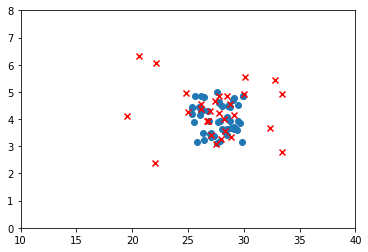

In [4]:
# Visualise the data
plt.scatter(X_train[:,0], X_train[:, 1], marker='o')
plt.scatter(X_val[:,0], X_val[:, 1], color='r', marker='x')
plt.ylim(0,8)
plt.xlim(10,40)

In [5]:
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

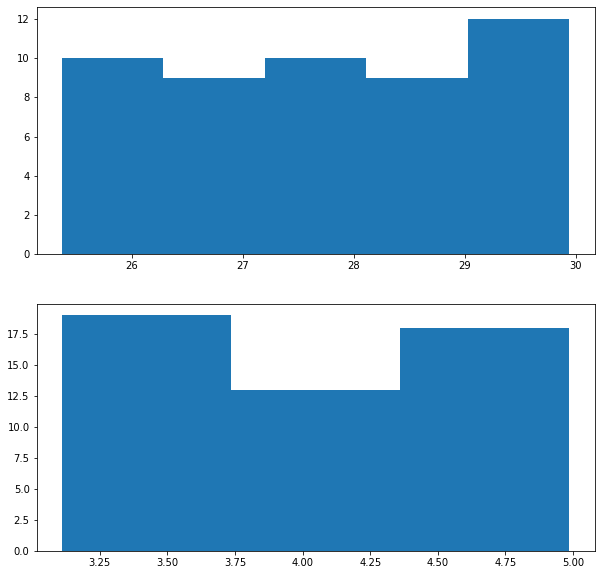

In [6]:
# Look at the distribution of each of the features in X_train

fig, ax = plt.subplots(2,1, figsize=(10,10))
 
ax[0].hist(X_train[:,0], bins=5) 
ax[1].hist(X_train[:,1], bins=3)
plt.show()

Even though the data does not necessarily have a normal / gaussian distribution, the algorithm still does well to detect any anomalies

In [7]:
# Get the values if Mean and Variance for the data set
def get_gaussian_distribution(X):
  """
  gets the gaussian distribution of the data

  parameters:
  X (numpy ndarray) : m * n dimensioned unlabeled data

  returns:
  mu () : 1 * n array showing the mean of the data
  var () : 1 * n array showing the variance of the data
  
  """
  m, n = X.shape
  # Compute the mean of each featrue in the data set
  mu = sum(X) / m
  # Compute the variance of each feature in the data set
  var = sum((X-mu)**2) / m
  
  return mu, var

In [8]:
mu, var = get_gaussian_distribution(X_train)

In [9]:
print(f"The mean is {mu}")
print(f"The variance is {var}")

The mean is [27.73018378  4.03769732]
The variance is [1.89337617 0.30048242]


$$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

In [10]:
# Get probabilities of features when provided with the array of all observations when provided witht he values of the gaussian distribution 

def get_probabilities(X, mu, var):
  # Initialise the array to hold the probabilities
  p_x_j = np.zeros(len(X))
  
  # Get probabiliities for each observation
  for j in range(len(X)):
    # Initialise the array that will hold the probabilities for each feature associated with the overall observation
    p_x_i = np.zeros(X[j].shape[0])
    for i in range(X[j].shape[0]):
      # Compute the probability of each individual feature
      denom = np.sqrt(2 * np.pi * var[i])
      exp_val = -((X[j][i]-mu[i]) ** 2 )/ (2 * var[i])
      p_x_i[i] = (1 / denom) * np.exp(exp_val)

    # Compute the overall probability of that observation as the product of all the feature probabilities
    p_x_j[j] = np.prod(p_x_i)

  return p_x_j

In [11]:
get_probabilities(X_train, mu, var)
#len(X_train[0].shape)

array([0.08544127, 0.09415485, 0.05027554, 0.11390054, 0.1536514 ,
       0.07602992, 0.20368914, 0.0201816 , 0.10075875, 0.09943719,
       0.17850129, 0.06443728, 0.07678294, 0.11042529, 0.05813634,
       0.11211561, 0.06239152, 0.20538618, 0.07573648, 0.05392377,
       0.11133577, 0.12952158, 0.17271509, 0.06958433, 0.09755642,
       0.13014469, 0.0389453 , 0.0195701 , 0.10408964, 0.02314839,
       0.05106996, 0.03865963, 0.09536159, 0.12149289, 0.12134733,
       0.15048238, 0.06224901, 0.04678842, 0.08619174, 0.03650678,
       0.11761321, 0.01627152, 0.09865281, 0.13661887, 0.04758038,
       0.15728008, 0.10226543, 0.14945347, 0.04714498, 0.01992872])

In [12]:
# Determine the threshold probability below which an observation will be considered abnormal
# The threshold will be considered using the F1 score
def select_threshold(y_val, p_val):

  best_F1 = 0
  best_epsilon = 0
  step_value = (p_val.max() - p_val.min()) / 1000
  # Consider a wide range of theshold values
  for epsilon in np.arange(p_val.min(), p_val.max(), step_value):
    
    predictions = p_val < epsilon
    # Compute the True Positive (tp), False Positive(fp), False Negative(fn)
    tp = sum(predictions[y_val == 1])
    fp = sum(predictions[y_val == 0])
    fn = sum(y_val[predictions == 0])

    precision_score = tp / (tp + fp)
    recall_score = tp / (tp + fn)
    
    #Compute the f1 score for each value of epsilon
    F1 = (2 * precision_score * recall_score) / (precision_score + recall_score)

    if F1 > best_F1:
      best_F1 = F1
      best_epsilon = epsilon

  return best_F1, best_epsilon    


In [13]:
get_probabilities(X_val, mu, var)

array([2.00728209e-01, 7.35716400e-02, 4.71047664e-02, 1.62558245e-01,
       1.30511662e-01, 1.22033570e-01, 1.53820017e-01, 1.66848918e-01,
       1.01261600e-01, 6.65578407e-02, 7.39161985e-02, 1.01036638e-01,
       7.48668384e-02, 1.50427378e-02, 1.10498760e-01, 8.93190827e-02,
       1.65464253e-01, 2.76289534e-02, 6.26392182e-02, 1.98087717e-01,
       5.10458213e-03, 7.06904513e-11, 7.31821802e-08, 4.22003819e-09,
       5.27966400e-07, 1.15964569e-05, 8.73288472e-06, 5.91103191e-04,
       1.04033559e-03, 2.66268859e-06])

In [14]:
F1_score, epsilon = select_threshold(y_val, get_probabilities(X_val, mu, var))
print("F1 Score ", F1_score)
print("Best Epsilon ", epsilon)

F1 Score  1.0
Best Epsilon  0.005218933513605946


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [15]:
# Predict anomalous occurences based on already trained parameters
def predict(X_test, epsilon, mu, var):

  y_prob = get_probabilities(X_test, mu, var)

  y_pred = (y_prob < epsilon) + 0

  return y_pred

In [16]:
y_pred = predict(X_val, epsilon, mu, var)

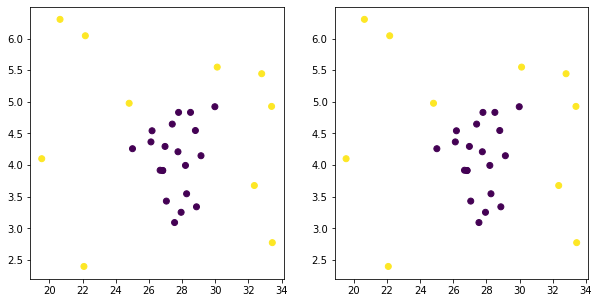

In [17]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

ax[0].scatter(X_val[:,0], X_val[:,1], c=y_val)
ax[1].scatter(X_val[:,0], X_val[:,1], c=y_pred)
ax[1].set_label(y_pred)